In [212]:

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import nfl_data_py  as nfl
#import data_visualization as dv



In [84]:
draft_picks = nfl.import_draft_picks
selected_draft_picks = draft_picks(years = range(2013,2024))

In [85]:
offset_list = [['GNB', 'GB'],
 ['KAC', 'KC'],
 ['KAN', 'KC'],
 ['LA', 'LAR'],
 ['LVR', 'LV'],
 ['NOR', 'NO'],
 ['NWE', 'NE'],
 ['OAK', 'LV'],
 ['SD', 'SDG'],
 ['SDG', 'LAC'],
 ['SFO', 'SF'],
 ['STL', 'LAR'],
 ['TAM', 'TB']]

In [86]:
team_win_v_picks = pd.DataFrame()

In [197]:
temp_df_draft= selected_draft_picks.groupby(['team']).count()['round']

temp_df_draft.index.names = ['team']

temp_df_draft = temp_df_draft.reset_index()
for i in range(len(offset_list)):
    temp_df_draft.loc[temp_df_draft['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_draft = temp_df_draft.groupby('team').sum()


temp_df_draft_top100= selected_draft_picks[selected_draft_picks['pick'] <= 100].groupby(['team']).count()['round']
temp_df_draft_top100.index.names = ['team']

temp_df_draft_top100 = temp_df_draft_top100.reset_index()
for i in range(len(offset_list)):
    temp_df_draft_top100.loc[temp_df_draft_top100['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_draft_top100 = temp_df_draft_top100.groupby('team').sum()



temp_df_draft_after100= selected_draft_picks[selected_draft_picks['pick'] > 100].groupby(['team']).count()['round']
temp_df_draft_after100.index.names = ['team']

temp_df_draft_after100 = temp_df_draft_after100.reset_index()
for i in range(len(offset_list)):
    temp_df_draft_after100.loc[temp_df_draft_after100['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_draft_after100 = temp_df_draft_after100.groupby('team').sum()

temp_df_draft_rnd_1= selected_draft_picks[selected_draft_picks['round'] == 1].groupby(['team']).count()['round']
temp_df_draft_rnd_1.index.names = ['team']

temp_df_draft_rnd_1 = temp_df_draft_rnd_1.reset_index()
for i in range(len(offset_list)):
    temp_df_draft_rnd_1.loc[temp_df_draft_rnd_1['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_draft_rnd_1 = temp_df_draft_rnd_1.groupby('team').sum()


In [198]:
team_win_v_picks['all_picks'] = temp_df_draft
team_win_v_picks['top_100_picks'] = temp_df_draft_top100
team_win_v_picks['after_100_picks'] = temp_df_draft_after100
team_win_v_picks['round_1_picks'] = temp_df_draft_rnd_1

In [168]:
schedules = nfl.import_schedules(years = range(2013,2024))

In [169]:
def find_winner(point_dif,home,away):


    if point_dif > 0:
        winner = home
    elif point_dif < 0:
        winner = away

    else:
        winner = 'tie'


    return winner

In [170]:
schedules['winning_id'] = schedules.apply(lambda row: find_winner(row['result'],row['home_team'],row['away_team']), axis=1)

In [220]:
temp_df =  schedules[schedules['game_type'] == 'REG'].groupby(['winning_id']).count()['game_id']

temp_df.index.names = ['team']
#temp_df.columns.names = ['wins']

temp_df = temp_df.reset_index()
for i in range(len(offset_list)):
    temp_df.loc[temp_df['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df = temp_df.groupby('team').sum()

temp_df_post =  schedules[schedules['game_type'] != 'REG'].groupby(['winning_id']).count()['game_id']

temp_df_post.index.names = ['team']
#temp_df.columns.names = ['wins']

temp_df_post = temp_df_post.reset_index()
for i in range(len(offset_list)):
    temp_df_post.loc[temp_df_post['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_post = temp_df_post.groupby('team').sum()

In [218]:
schedules['game_type'].unique()

array(['REG', 'WC', 'DIV', 'CON', 'SB'], dtype=object)

In [172]:
len(temp_df)

33

In [223]:
team_win_v_picks['reg_wins']  = temp_df
team_win_v_picks['post_wins']  = temp_df_post.fillna(0)

In [224]:
team_win_v_picks['delta'] = team_win_v_picks['reg_wins']  - team_win_v_picks['all_picks'] 

In [225]:
print(team_win_v_picks.sort_values('after_100_picks'))

      picks  wins  delta  all_picks  top_100_picks  after_100_picks  \
team                                                                  
NO       12   106     40         66             32               34   
CAR       9    82     10         72             32               40   
TB       11    79      1         78             36               42   
TEN      13    84      3         81             38               43   
LAC      11    84      8         76             32               44   
NYG      13    67    -15         82             37               45   
MIA      12    89     10         79             34               45   
HOU      16    75     -7         82             37               45   
KC       13   128     49         79             33               46   
ATL      10    78      0         78             32               46   
BUF      11   103     24         79             33               46   
PHI      10   103     25         78             31               47   
ARI   

In [226]:
team_desc = nfl.import_team_desc().set_index('team_abbr')


In [227]:
team_desc.index

Index(['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN',
       'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC', 'LA', 'LAC', 'LAR', 'LV', 'MIA',
       'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'OAK', 'PHI', 'PIT', 'SD', 'SEA', 'SF',
       'STL', 'TB', 'TEN', 'WAS'],
      dtype='object', name='team_abbr')

In [228]:
curr_team

'WAS'

In [229]:
for i,k in enumerate(curr_picks):
    print(i,k)

0 all_picks
1 top_100_picks
2 after_100_picks
3 round_1_picks


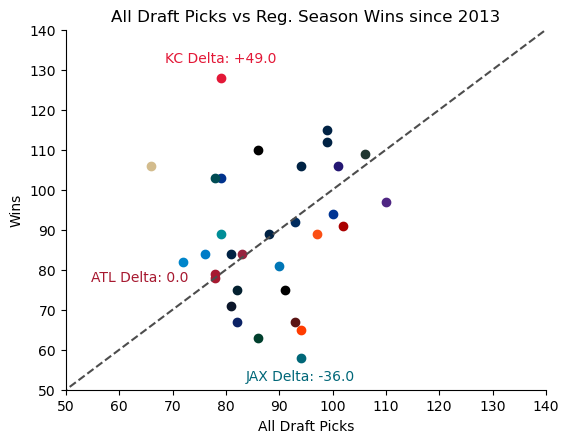

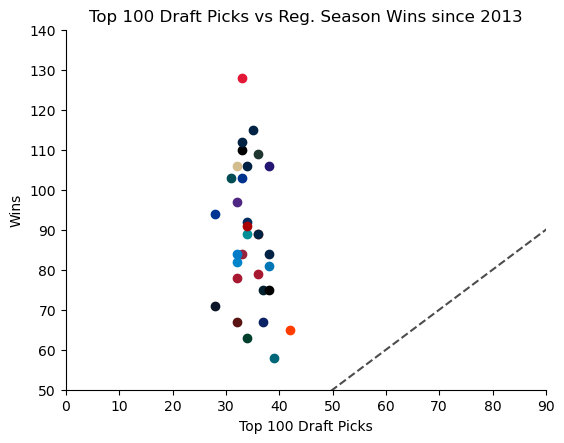

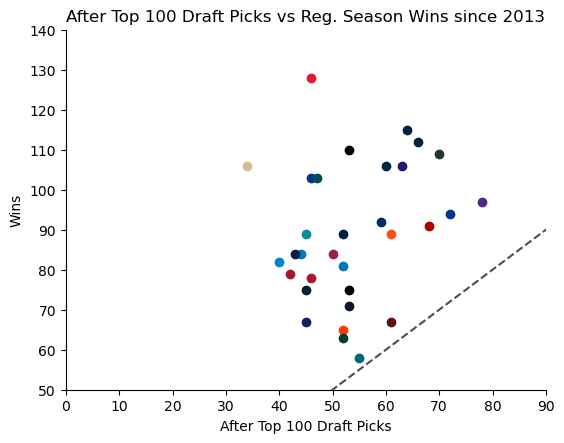

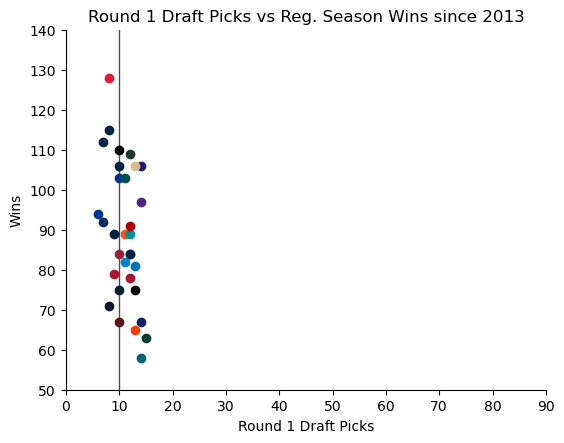

In [230]:
picksets = 3

curr_picks = ['all_picks','top_100_picks','after_100_picks','round_1_picks']
curr_pick_label = ['All Draft Picks','Top 100 Draft Picks','After Top 100 Draft Picks','Round 1 Draft Picks']


x_bounds = [[50,140],
            [0,90],
            [0,90],
             [0,90]]
for j,curr_pick_option in enumerate(curr_picks):

    curr_fig = plt.figure()
    curr_ax = curr_fig.add_axes([.2,.2,.75,.75])

    for i in range(len(team_win_v_picks)):
        curr_team = team_win_v_picks.index[i]
        curr_row = team_win_v_picks.loc[curr_team]
        curr_ax.scatter(curr_row[curr_pick_option],curr_row['reg_wins'],color = team_desc.loc[curr_team,'team_color'])

        #print(curr_team)
                

    unity_color = ".3" if j != 3 else 'none'
    unity_line = curr_ax.plot([0,200],[0,200],color = unity_color,ls = '--')

    #curr_ax.set_xlim([50,140])

    curr_ax.set_xlim(x_bounds[j])
    curr_ax.set_ylim([50,140])

    curr_ax.set_xlabel(curr_pick_label[j])
    curr_ax.set_ylabel('Wins')
    curr_ax.set_title(f'{curr_pick_label[j]} vs Reg. Season Wins since 2013')
    curr_ax.spines['top'].set_visible(False)
    curr_ax.spines['right'].set_visible(False)

    best_team = 'KC'
    if j == 0:
        curr_row = team_win_v_picks.loc[best_team]
        curr_ax.text(curr_row[curr_pick_option],curr_row['reg_wins'] +3 ,f'{best_team} Delta: +{curr_row["delta"]}' ,color = team_desc.loc[best_team,'team_color'],
                    ha= 'center',va = 'bottom')

        worst_team = 'JAX'

        curr_row = team_win_v_picks.loc[worst_team]
        curr_ax.text(curr_row[curr_pick_option],curr_row['reg_wins'] - 3 ,f'{worst_team} Delta: {curr_row["delta"]}' ,color = team_desc.loc[worst_team,'team_color'],
                                ha= 'center',va = 'top')

        mid_team = 'ATL'

        curr_row = team_win_v_picks.loc[mid_team]
        curr_ax.text(curr_row[curr_pick_option]-5,curr_row['reg_wins'] ,f'{mid_team} Delta: {curr_row["delta"]}' ,color = team_desc.loc[mid_team,'team_color'],
                            ha= 'right',va = 'center')
    if j == 3:
#        unity_line.set_visible(False)
        curr_ax.axvline(10,color = '.3',lw = 1,zorder = -5)


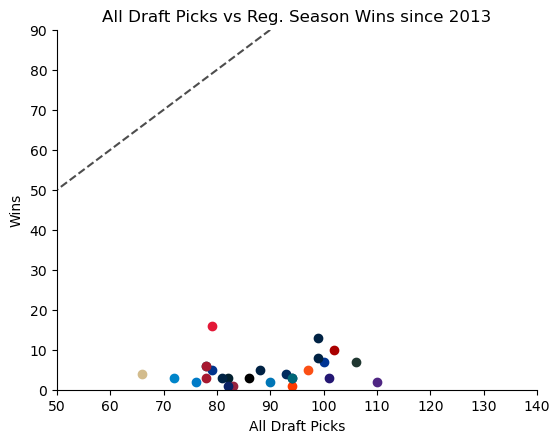

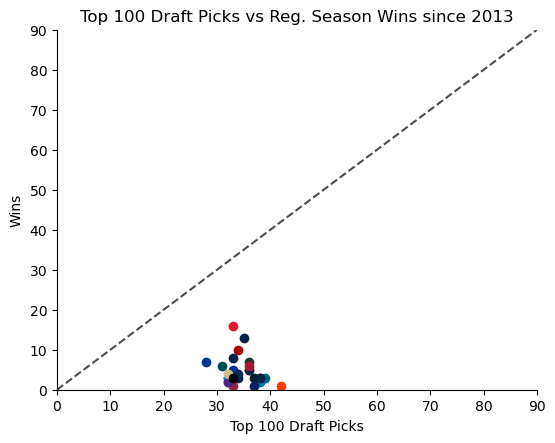

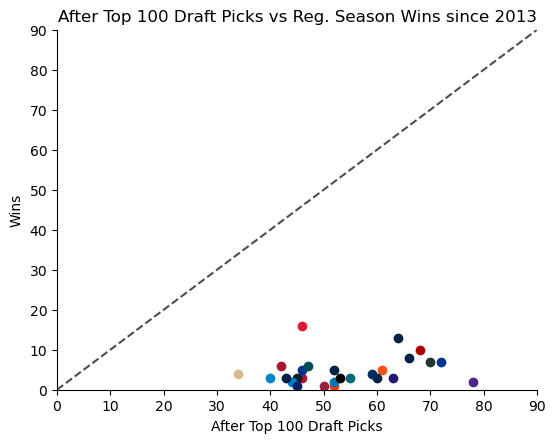

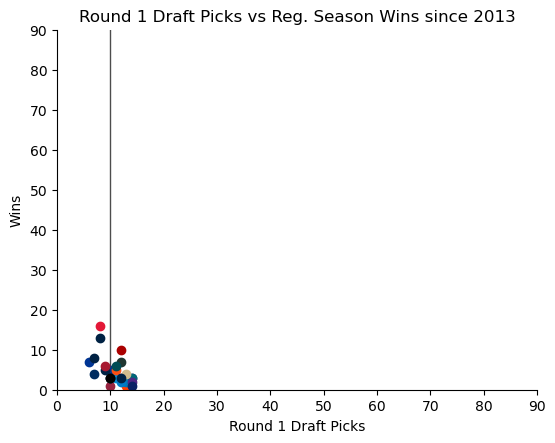

In [233]:
picksets = 3

curr_picks = ['all_picks','top_100_picks','after_100_picks','round_1_picks']
curr_pick_label = ['All Draft Picks','Top 100 Draft Picks','After Top 100 Draft Picks','Round 1 Draft Picks']


x_bounds = [[50,140],
            [0,90],
            [0,90],
             [0,90]]
for j,curr_pick_option in enumerate(curr_picks):

    curr_fig = plt.figure()
    curr_ax = curr_fig.add_axes([.2,.2,.75,.75])

    for i in range(len(team_win_v_picks)):
        curr_team = team_win_v_picks.index[i]
        curr_row = team_win_v_picks.loc[curr_team]
        curr_ax.scatter(curr_row[curr_pick_option],curr_row['post_wins'],color = team_desc.loc[curr_team,'team_color'])

        #print(curr_team)
                

    unity_color = ".3" if j != 3 else 'none'
    unity_line = curr_ax.plot([0,200],[0,200],color = unity_color,ls = '--')

    #curr_ax.set_xlim([50,140])

    curr_ax.set_xlim(x_bounds[j])
    curr_ax.set_ylim([0,90])

    curr_ax.set_xlabel(curr_pick_label[j])
    curr_ax.set_ylabel('Wins')
    curr_ax.set_title(f'{curr_pick_label[j]} vs Reg. Season Wins since 2013')
    curr_ax.spines['top'].set_visible(False)
    curr_ax.spines['right'].set_visible(False)

    best_team = 'KC'
    if j < 0:
        curr_row = team_win_v_picks.loc[best_team]
        curr_ax.text(curr_row[curr_pick_option],curr_row['post_wins'] +3 ,f'{best_team} Delta: +{curr_row["delta"]}' ,color = team_desc.loc[best_team,'team_color'],
                    ha= 'center',va = 'bottom')

        worst_team = 'JAX'

        curr_row = team_win_v_picks.loc[worst_team]
        curr_ax.text(curr_row[curr_pick_option],curr_row['post_wins'] - 3 ,f'{worst_team} Delta: {curr_row["delta"]}' ,color = team_desc.loc[worst_team,'team_color'],
                                ha= 'center',va = 'top')

        mid_team = 'ATL'

        curr_row = team_win_v_picks.loc[mid_team]
        curr_ax.text(curr_row[curr_pick_option]-5,curr_row['post_wins'] ,f'{mid_team} Delta: {curr_row["delta"]}' ,color = team_desc.loc[mid_team,'team_color'],
                            ha= 'right',va = 'center')
    if j == 3:
#        unity_line.set_visible(False)
        curr_ax.axvline(10,color = '.3',lw = 1,zorder = -5)


In [217]:
for j,curr_pick_option in enumerate(curr_picks):

    out = stats.linregress(team_win_v_picks[curr_pick_option],team_win_v_picks['reg_wins'])
    print(out)

for j,curr_pick_option in enumerate(curr_picks):

    out = stats.spearmanr(team_win_v_picks[curr_pick_option],team_win_v_picks['reg_wins'])
    print(out)

LinregressResult(slope=0.23420003451063018, intercept=68.50807821198609, rvalue=0.1429697448819744, pvalue=0.43503512708041936, stderr=0.2960040336939136, intercept_stderr=26.237766907655185)
LinregressResult(slope=-1.5894378194207837, intercept=143.76192504258944, rvalue=-0.28337688271144285, pvalue=0.11603027133126206, stderr=0.9820667551418395, intercept_stderr=33.889308085713054)
LinregressResult(slope=0.38402988030898955, intercept=68.51939673467078, rvalue=0.23004187322825773, pvalue=0.20529548042074897, stderr=0.29661355619651786, intercept_stderr=16.198824386081117)
LinregressResult(slope=-2.9425454545454546, intercept=121.30909090909091, rvalue=-0.40146377047134435, pvalue=0.02276060795276574, stderr=1.2256101618665387, intercept_stderr=13.702738179240505)
SignificanceResult(statistic=0.20450367992578938, pvalue=0.26154891095269134)
SignificanceResult(statistic=-0.26741511541988505, pvalue=0.13896863191494796)
SignificanceResult(statistic=0.29786655109082283, pvalue=0.09776697

In [238]:
for j,curr_pick_option in enumerate(curr_picks):

    out = stats.linregress(team_win_v_picks[curr_pick_option],team_win_v_picks['post_wins'].fillna(0))
    print(out)

for j,curr_pick_option in enumerate(curr_picks):

    out = stats.spearmanr(team_win_v_picks[curr_pick_option],team_win_v_picks['post_wins'].fillna(0))
    print(out)

LinregressResult(slope=0.06276393820780848, intercept=-1.4939379353561408, rvalue=0.17693847282381236, pvalue=0.3326623533513231, stderr=0.06374121169598258, intercept_stderr=5.6500144069661165)
LinregressResult(slope=-0.14778534923339012, intercept=9.111371379897786, rvalue=-0.12167662615427688, pvalue=0.5070784169173603, stderr=0.220102335518591, intercept_stderr=7.595324675965838)
LinregressResult(slope=0.07827546853041321, intercept=-0.1687181083349838, rvalue=0.21653218341620933, pvalue=0.23391142290358952, stderr=0.06443398256538298, intercept_stderr=3.5189044676734995)
LinregressResult(slope=-0.7734545454545455, intercept=12.490909090909092, rvalue=-0.48731847420214913, pvalue=0.004671509029641329, stderr=0.2530387964460925, intercept_stderr=2.8290597489909755)
SignificanceResult(statistic=0.17335594725539535, pvalue=0.3427000126106611)
SignificanceResult(statistic=-0.08367631761426307, pvalue=0.6488846264154371)
SignificanceResult(statistic=0.21282182532251065, pvalue=0.2422181

In [101]:
curr_team

'WAS'

In [102]:
curr_row = team_win_v_picks.loc[curr_team]
print(curr_row)

picks    32
wins     67
delta    35
Name: WAS, dtype: int64


In [103]:
team_win_v_picks.index

Index(['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN',
       'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC', 'LAC', 'LAR', 'LV', 'MIA',
       'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'PHI', 'PIT', 'SEA', 'SF', 'TB', 'TEN',
       'WAS'],
      dtype='object', name='team')

In [104]:
team_win_v_picks = team_win_v_picks.reset_index()

In [105]:
#team_win_v_picks


for i in range(len(offset_list)):
    team_win_v_picks[team_win_v_picks['team'] == offset_list[i][0]]['team'] = offset_list[i][1]

